In [17]:
import os
os.getcwd()

'C:\\Users\\dell'

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA (Exploratory Data Analysis)

In [21]:
# Check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
# Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [59]:
# Fill 'Embarked' missing values with mode
df['Embarked'].fillna( df['Embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: category
Categories (3, object): ['C', 'Q', 'S']

In [24]:
# Drop 'Cabin' due to too many missing values
df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

In [25]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [30]:
# Create a new feature: FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['FamilySize'].head()

0    2
1    2
2    1
3    2
4    1
Name: FamilySize, dtype: int64

In [31]:
# Convert categorical columns
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

In [37]:
df.dtypes

Survived         int64
Pclass        category
Sex           category
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked      category
FamilySize       int64
dtype: object

In [38]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


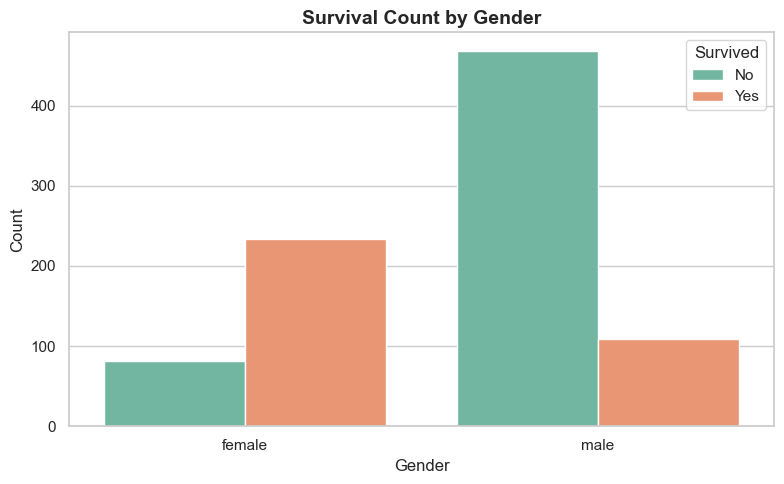

In [40]:
# Survival Count by Gender

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title("Survival Count by Gender", fontsize=14, weight='bold')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

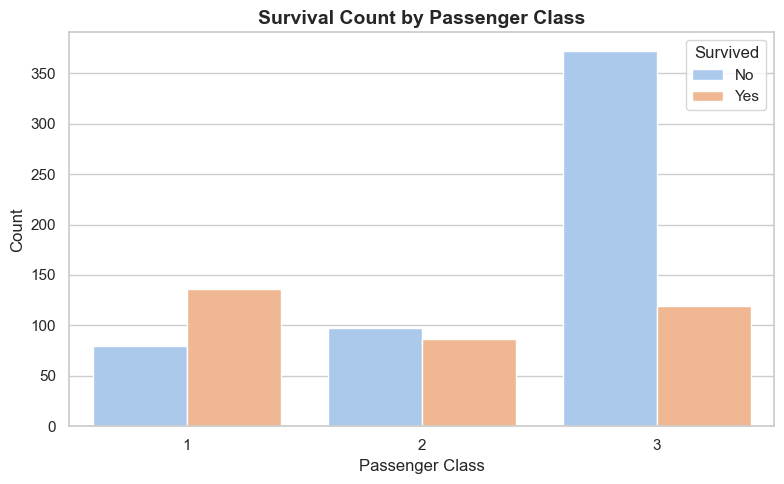

In [41]:
# Survival Count by Passenger Class

plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='pastel')
plt.title("Survival Count by Passenger Class", fontsize=14, weight='bold')
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

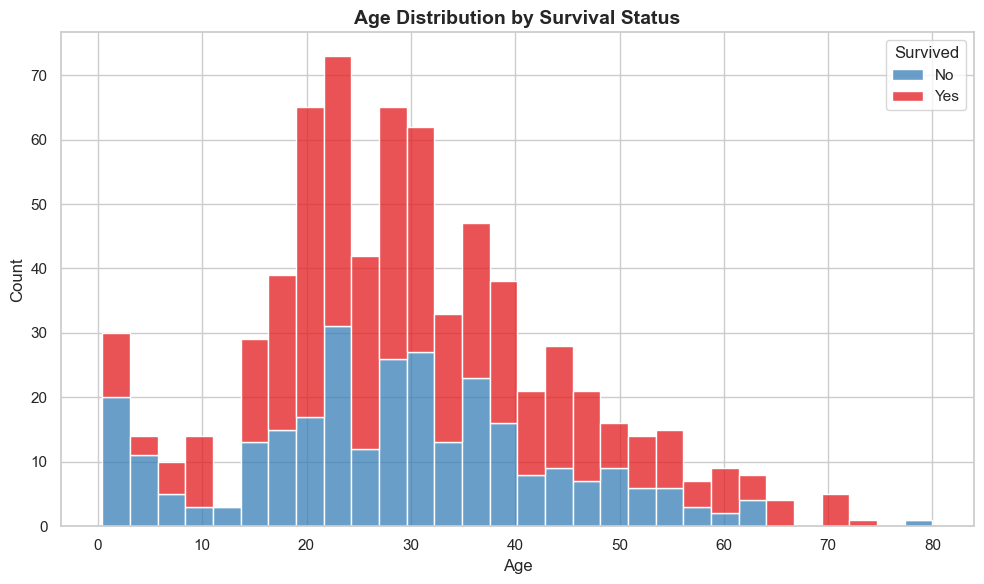

In [52]:
# Age Distribution by Survival Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30, palette='Set1')
plt.title("Age Distribution by Survival Status", fontsize=14, weight='bold')
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

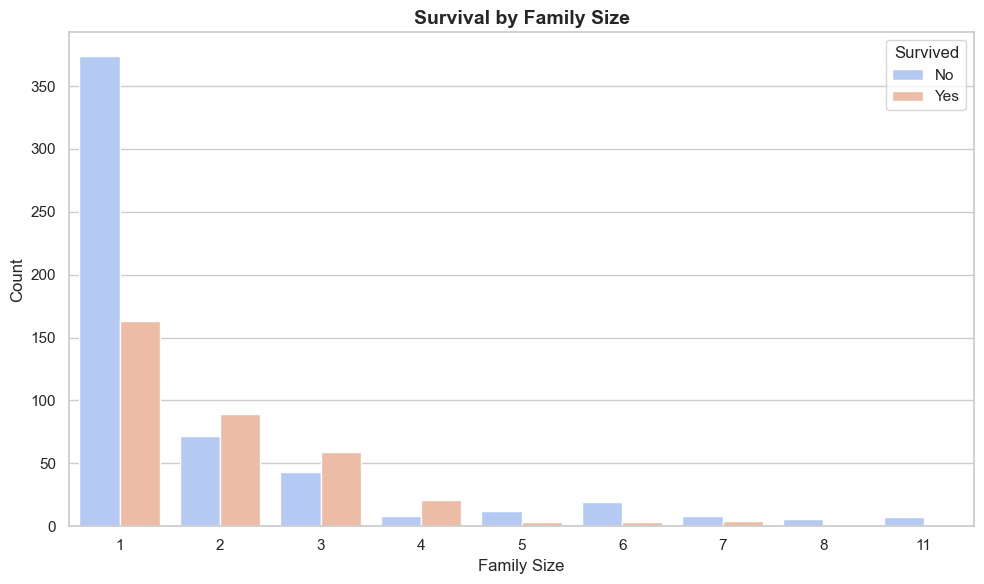

In [53]:
# Survival by Family Size
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df, palette='coolwarm')
plt.title("Survival by Family Size", fontsize=14, weight='bold')
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

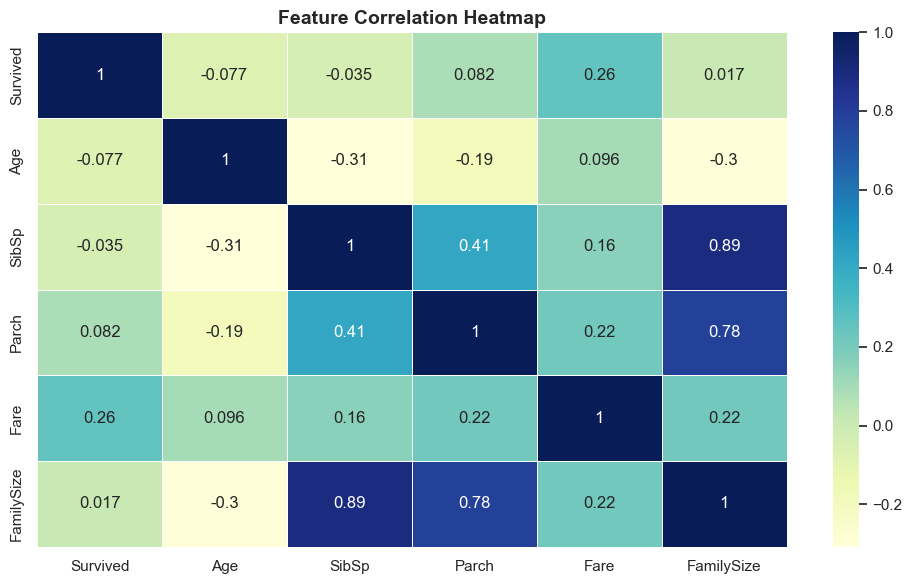

In [54]:
# Correlation Between Numerical Features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

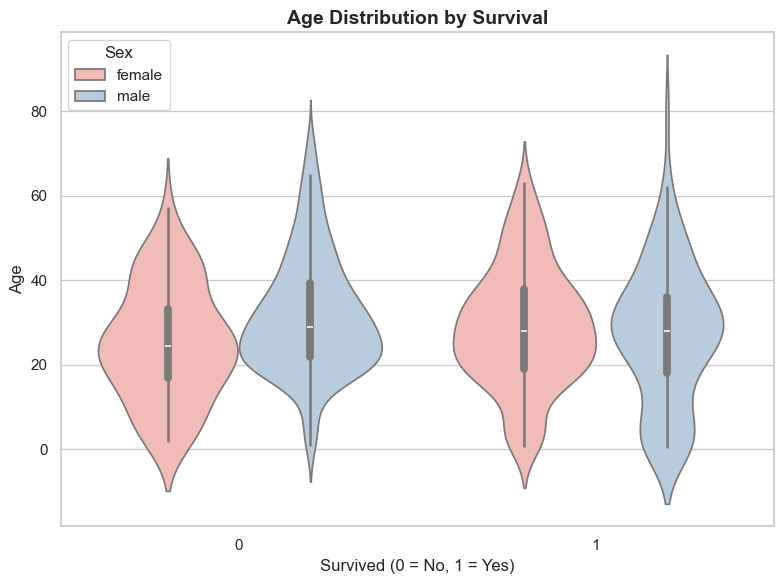

In [56]:
# Violin Plot of Age vs Survived
plt.figure(figsize=(8, 6))
sns.violinplot(x='Survived', y='Age', hue = 'Sex', data=df, palette='Pastel1')
plt.title("Age Distribution by Survival", fontsize=14, weight='bold')
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

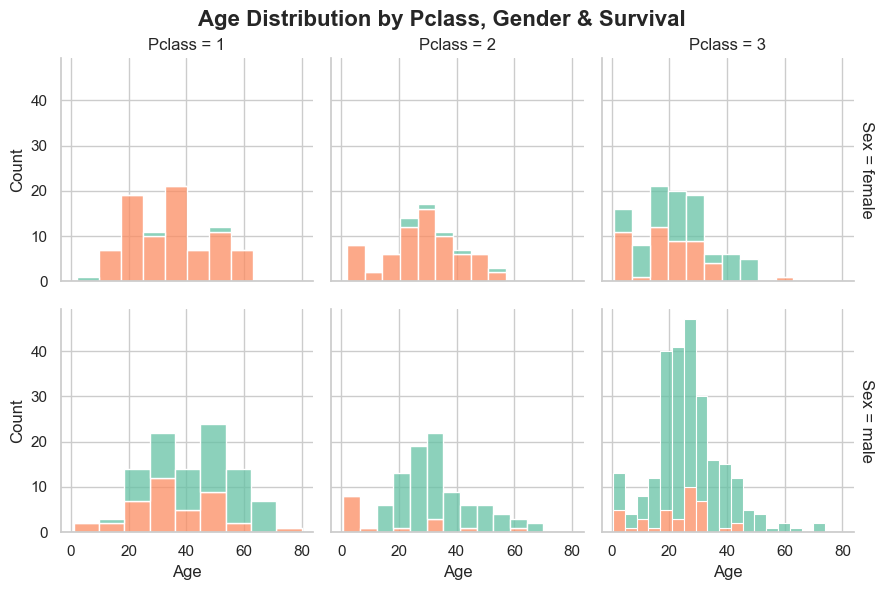

In [58]:
# FacetGrid: Survival by Pclass and Gender
g = sns.FacetGrid(df, col='Pclass', row='Sex', margin_titles=True)
g.map_dataframe(sns.histplot, x='Age', hue='Survived', multiple='stack', palette='Set2')
g.fig.suptitle("Age Distribution by Pclass, Gender & Survival", fontsize=16, weight='bold')
g.fig.tight_layout()
plt.subplots_adjust(top=0.9) 
plt.show()

### Conclusion:
After cleaning and analyzing the Titanic dataset, key patterns emerged:

1. Females had a significantly higher survival rate than males.

2. 1st class passengers were most likely to survive, showing the impact of socio-economic status.

3. Younger passengers had better survival odds, especially when traveling with family.

4. Family size mattered — solo travelers had lower survival chances than those with small families.

5. Passengers who boarded from Cherbourg (C) had slightly better survival outcomes.

These insights show how survival wasn’t random — it was influenced by gender, age, class, and travel group size.